In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from os import listdir, getcwd, chdir
from os.path import isfile, join

from diff_classifier.features import alpha_calc, unmask_track
from diff_predictor.utils import plot_msd_comparisons, plot_individual_msds, plot_particles_in_frame

import scipy.stats as stats
from scipy.optimize import curve_fit
import numpy.ma as ma
import lmfit

In [2]:
workbookDir = getcwd()

print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir"
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/Nance Lab/diff_predictor/notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/Nance Lab/diff_predictor


# Age Data

In [3]:
age_msd_path = workbookDir + '/raw_data_age/'
age_feature_path = workbookDir + '/data/raw_data_age/'

age_msd_filelist_70 = [f for f in listdir(age_msd_path) if isfile(join(age_msd_path, f)) and 'P70' in f]
age_msd_filelist_14 = [f for f in listdir(age_msd_path) if isfile(join(age_msd_path, f)) and 'P14' in f]
age_msd_filelist_35 = [f for f in listdir(age_msd_path) if isfile(join(age_msd_path, f)) and 'P35' in f]
age_msd_filelist = age_msd_filelist_70 + age_msd_filelist_14 + age_msd_filelist_35

age_feature_filelist_70 = [f for f in listdir(age_feature_path) if isfile(join(age_feature_path, f)) and 'features_P70' in f ]
age_feature_filelist_14 = [f for f in listdir(age_feature_path) if isfile(join(age_feature_path, f)) and 'features_P14' in f ]
age_feature_filelist_35 = [f for f in listdir(age_feature_path) if isfile(join(age_feature_path, f)) and 'features_P35' in f ]

age_feature_filelist = age_feature_filelist_14 + age_feature_filelist_35 + age_feature_filelist_70

print(len(age_msd_filelist))
print(len(age_feature_filelist))

45
45


## Scipy curvefit

In [6]:
perr_alph = []
mag_alph = []
perr_dcoef = []
mag_coef = []

high_error_trajs = []

for i in range(len(age_msd_filelist)):

    
    msd_df = pd.read_csv(age_msd_path + age_msd_filelist[i])
    trackids = msd_df['Track_ID'].unique()
    partcount = trackids.shape[0]
    for particle in range(0, partcount):

        single_track_masked = msd_df.loc[msd_df['Track_ID'] == trackids[particle]].sort_values(['Track_ID', 'Frame'], ascending=[1,1]).reset_index(drop=True)
        single_track = unmask_track(single_track_masked)
        xpos = single_track['MSDs']
        ypos = single_track['Frame']

        def msd_alpha(xpos, alph, dcoef):
                return 4*dcoef*(xpos**alph)

        try:
            popt, pcov = curve_fit(msd_alpha, xpos, ypos)
            alph = popt[0]
            dcoef = popt[1]
            perr = np.sqrt(np.diag(pcov))
            perr_alph.append(perr[0])
            perr_dcoef.append(perr[1])
            mag_alph.append(alph)
            mag_coef.append(dcoef)

            if perr[0] >= 10:
                high_error_trajs.append((age_msd_filelist[i], alph, dcoef, perr[0]))
        except RuntimeError:
            print('Optimal parameters not found. Print NaN instead.')
            alph = np.nan
            dcoef = np.nan
        

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

In [7]:
high_error_trajs

[('msd_P70_40nm_s2_v3.csv', 5.219281515728532e-11, 4.125000001272253, inf),
 ('msd_P70_40nm_s3_v2.csv', 8.793873841708586e-11, 2.499999999253852, inf),
 ('msd_P70_40nm_s3_v3.csv', 3.821451541497489e-10, 2.2499999961646466, inf),
 ('msd_P70_40nm_s3_v3.csv', 2.8238008982058225e-11, 2.3750000002531717, inf),
 ('msd_P70_40nm_s3_v4.csv', 3.176618089488928e-10, 2.9999999935865023, inf),
 ('msd_P70_40nm_s3_v4.csv',
  1.4539190064690151e-06,
  1.3776249141184778,
  15.108241938426618),
 ('msd_P70_40nm_s3_v4.csv', 1.1935324489490617e-11, 3.3749999997717954, inf),
 ('msd_P70_40nm_s3_v4.csv', 1.3843848191384162e-10, 2.7499999973478437, inf),
 ('msd_P70_40nm_s3_v5.csv', 1.6664414479057763e-10, 5.24999999706764, inf),
 ('msd_P70_40nm_s3_v5.csv', 4.028066857320575e-11, 2.374999998949504, inf),
 ('msd_P14_40nm_s1_v2.csv', 1.93782236341851e-10, 1.5000000001257998, inf),
 ('msd_P14_40nm_s1_v3.csv', 5.056609723006255e-10, 1.7499999994495996, inf),
 ('msd_P35_brain_2_slice_1_vid_5.csv',
  2.1645463759352

## LMFIT

In [8]:
perr_alph = []
perr_dcoef = []

for i in range(len(age_msd_filelist)):

    
    msd_df = pd.read_csv(age_msd_path + age_msd_filelist[i])
    trackids = msd_df['Track_ID'].unique()
    partcount = trackids.shape[0]
    for particle in range(0, partcount):

        single_track_masked = msd_df.loc[msd_df['Track_ID'] == trackids[particle]].sort_values(['Track_ID', 'Frame'], ascending=[1,1]).reset_index(drop=True)
        single_track = unmask_track(single_track_masked)
        xpos = single_track['MSDs']
        ypos = single_track['Frame']

        def msd_alpha(xpos, alph, dcoef):
                return 4*dcoef*(xpos**alph) #math.pow

        msd_model = lmfit.Model(msd_alpha)
        msd_model.set_param_hint('alph', value=1.0, min=0.00001, max=13)
        #msd_model.set_param_hint('dcoef', value=1.0, min=0, max=10)
        #params = msd_model.make_params(alph=1, dcoef=1)
        

        try:
            model_result = msd_model.fit(ypos, xpos=xpos, alph=1, dcoef=1)
            print(model_result.model_pars)
            
        except RuntimeError:
        #except ValueError:
            print('Optimal parameters not found. Print NaN instead.')
            alph = np.nan
            dcoef = np.nan

AttributeError: 'ModelResult' object has no attribute 'model_pars'

Text(0.5, 1.0, 'Distribution of error for alpha curve fitting')

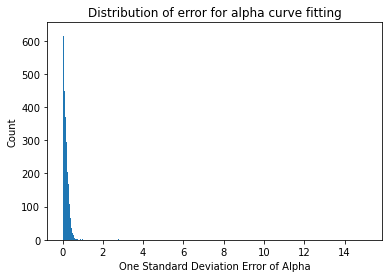

In [65]:
perr_alph_arr = np.array(perr_alph)
perr_alph_arr = perr_alph_arr[perr_alph_arr != np.inf]
plt.hist((perr_alph_arr), bins=5000)
plt.xlabel('One Standard Deviation Error of Alpha')
plt.ylabel('Count')
plt.title('Distribution of error for alpha curve fitting')

In [66]:
big_err = perr_alph_arr[perr_alph_arr >=2]
big_err

array([ 2.78317483,  2.45625705,  2.1763242 ,  3.75662204,  2.28482542,
       15.10824194,  2.03027423,  2.77906724,  3.64097419,  2.79817972,
        4.03614938])

Text(0.5, 1.0, 'Magnitude of Alpha versus Error, Age Dataset')

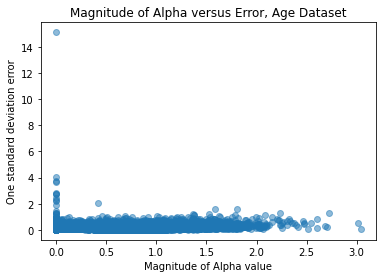

In [5]:
plt.scatter(mag_alph, perr_alph, alpha=0.5)
plt.xlabel('Magnitude of Alpha value')
plt.ylabel('One standard deviation error')
plt.title('Magnitude of Alpha versus Error, Age Dataset')

(array([5.83e+03, 3.25e+02, 1.89e+02, 7.30e+01, 1.20e+01, 8.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([2.07907946e-06, 1.09840294e+00, 2.19680379e+00, 3.29520465e+00,
        4.39360550e+00, 5.49200636e+00, 6.59040722e+00, 7.68880807e+00,
        8.78720893e+00, 9.88560978e+00, 1.09840106e+01]),
 <BarContainer object of 10 artists>)

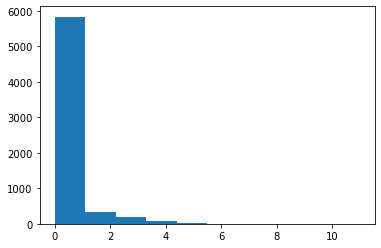

In [65]:
perr_dcoef_arr = np.array(perr_dcoef)
perr_dcoef_arr = perr_dcoef_arr[perr_dcoef_arr != np.inf]
plt.hist(perr_dcoef_arr)

In [25]:
popt

array([0.48696266, 3.23778483])

In [18]:
alpha, coef = alpha_calc(single_track)

# Region Data

In [8]:
region_dataset_path = workbookDir + '/data/region_feature_folder/'
region_filelist = [f for f in listdir(region_dataset_path) if isfile(join(region_dataset_path, f)) and 'feat' in f]

region_msd_path = workbookDir + '/data/raw_data_region/'
region_msd_filelist = [f for f in listdir(region_msd_path) if isfile(join(region_msd_path, f)) and 'msd' in f]
print(len(region_filelist))
print(len(region_msd_filelist))

38
38


In [9]:
perr_alph = []
mag_alph = []
perr_dcoef = []
mag_dcoef = []

reg_high_error_trajs = []

for i in range(len(region_msd_filelist)):

    
    msd_df = pd.read_csv(region_msd_path + region_msd_filelist[i])
    trackids = msd_df['Track_ID'].unique()
    partcount = trackids.shape[0]
    for particle in range(0, partcount):

        single_track_masked = msd_df.loc[msd_df['Track_ID'] == trackids[particle]].sort_values(['Track_ID', 'Frame'], ascending=[1,1]).reset_index(drop=True)
        single_track = unmask_track(single_track_masked)
        xpos = single_track['MSDs']
        ypos = single_track['Frame']

        def msd_alpha(xpos, alph, dcoef):
                return 4*dcoef*(xpos**alph)

        try:
            popt, pcov = curve_fit(msd_alpha, xpos, ypos)
            alph = popt[0]
            dcoef = popt[1]
            perr = np.sqrt(np.diag(pcov))
            perr_alph.append(perr[0])
            perr_dcoef.append(perr[1])
            mag_alph.append(alph)
            mag_dcoef.append(dcoef)
            if perr[0] >= 10:
                high_error_trajs.append((age_msd_filelist[i], alph, dcoef, perr[0]))
            
        except RuntimeError:
            print('Optimal parameters not found. Print NaN instead.')
            alph = np.nan
            dcoef = np.nan
        

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

Optimal parameters not found. Print NaN instead.


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

Optimal parameters not found. Print NaN instead.


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

In [18]:
reg_high_error_trajs

[]

In [75]:
np.array(mag_alph).min()

2.7767198110452028e-12

Text(0.5, 1.0, 'Magnitude of Alpha versus Error, Region Dataset')

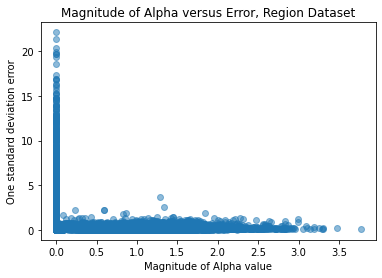

In [15]:
plt.scatter((np.array(mag_alph)), (np.array(perr_alph)), alpha=0.5)
plt.xlabel('Magnitude of Alpha value')
plt.ylabel('One standard deviation error')
plt.title('Magnitude of Alpha versus Error, Region Dataset')

(array([3.843e+03, 2.918e+03, 2.476e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([1.05104926e-04, 4.52699920e-03, 8.94889347e-03, ...,
        2.21007327e+01, 2.21051546e+01, 2.21095765e+01]),
 <BarContainer object of 5000 artists>)

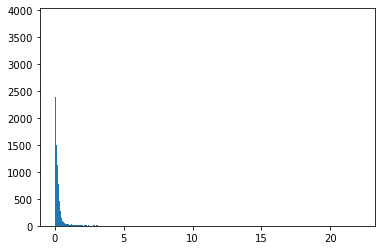

In [57]:
perr_alph_arr = np.array(perr_alph)
perr_alph_arr = perr_alph_arr[perr_alph_arr != np.inf]
plt.hist((perr_alph_arr), bins=5000)

In [62]:
big_err = perr_alph_arr[perr_alph_arr >=5]
len(big_err)

466

# Treatment

In [88]:
treatment_msd_path = workbookDir + '/raw_data_pnn/'
treatment_feature_path = workbookDir + '/data/ecm_feature_folder/'

treatment_msd_filelist_70 = [f for f in listdir(treatment_msd_path) if isfile(join(treatment_msd_path, f)) and 'NT' in f]
treatment_msd_filelist_14 = [f for f in listdir(treatment_msd_path) if isfile(join(treatment_msd_path, f)) and 'ChABC' in f]
treatment_msd_filelist = treatment_msd_filelist_70 + treatment_msd_filelist_14

treatment_feature_filelist_70 = [f for f in listdir(treatment_feature_path) if isfile(join(treatment_feature_path, f)) and 'NT' in f ]
treatment_feature_filelist_35 = [f for f in listdir(treatment_feature_path) if isfile(join(treatment_feature_path, f)) and 'ChABC' in f ]

treatment_feature_filelist =  treatment_feature_filelist_70 + treatment_feature_filelist_35

print(len(treatment_msd_filelist))
print(len(treatment_feature_filelist))

120
120


In [89]:
perr_alph = []
mag_alph = []
perr_dcoef = []
mag_dcoef = []

for i in range(len(treatment_msd_filelist)):

    
    msd_df = pd.read_csv(treatment_msd_path + treatment_msd_filelist[i])
    trackids = msd_df['Track_ID'].unique()
    partcount = trackids.shape[0]
    for particle in range(0, partcount):

        single_track_masked = msd_df.loc[msd_df['Track_ID'] == trackids[particle]].sort_values(['Track_ID', 'Frame'], ascending=[1,1]).reset_index(drop=True)
        single_track = unmask_track(single_track_masked)
        xpos = single_track['MSDs']
        ypos = single_track['Frame']

        def msd_alpha(xpos, alph, dcoef):
                return 4*dcoef*(xpos**alph)

        try:
            popt, pcov = curve_fit(msd_alpha, xpos, ypos)
            alph = popt[0]
            dcoef = popt[1]
            perr = np.sqrt(np.diag(pcov))
            perr_alph.append(perr[0])
            perr_dcoef.append(perr[1])
            mag_alph.append(alph)
            mag_dcoef.append(dcoef)
        except RuntimeError:
            print('Optimal parameters not found. Print NaN instead.')
            alph = np.nan
            dcoef = np.nan
        

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

Optimal parameters not found. Print NaN instead.


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

Text(0.5, 1.0, 'Magnitude of Alpha versus Error, Treatment Dataset')

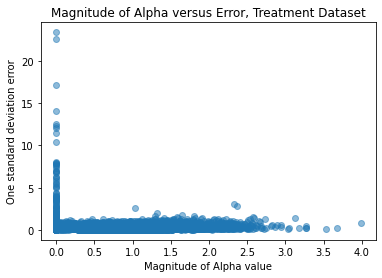

In [99]:
plt.scatter((np.array(mag_alph)), (np.array(perr_alph)), alpha=0.5)
plt.xlabel('Magnitude of Alpha value')
plt.ylabel('One standard deviation error')
plt.title('Magnitude of Alpha versus Error, Treatment Dataset')